# Telco Customer Churn Prediction Analysis
### Predict the customer whether churn or not

**Description Columns Attribute**

|Column Name|Description|
|----------|----------|
|customerID|Customer ID|
|gender|Whether the customer is a male or a female|
|SeniorCitizen|Whether the customer is a senior citizen or not (1, 0)|
|Partner|Whether the customer has a partner or not (Yes, No)|
|Dependents|Whether the customer has dependents or not (Yes, No)|
|tenure|Number of months the customer has stayed with the company|
|PhoneService|Whether the customer has a phone service or not (Yes, No)|
|MultipleLines|Whether the customer has multiple lines or not (Yes, No, No phone service)|
|InternetService|Customer’s internet service provider (DSL, Fiber optic, No)|
|OnlineSecurity|Whether the customer has online security or not (Yes, No, No internet service)|
|OnlineBackup|Whether the customer has online backup or not (Yes, No, No internet service)|
|DeviceProtection|Whether the customer has device protection or not (Yes, No, No internet service)|
|TechSupport|Whether the customer has tech support or not (Yes, No, No internet service)|
|StreamingTV|Whether the customer has streaming TV or not (Yes, No, No internet service)|
|StreamingMovies|Whether the customer has streaming movies or not (Yes, No, No internet service)|
|Contract|The contract term of the customer (Month-to-month, One year, Two year)|
|PaperlessBilling|Whether the customer has paperless billing or not (Yes, No)|
|PaymentMethod|The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))|
|MonthlyCharges|The amount charged to the customer monthly|
|TotalCharges|The total amount charged to the customer|
|Churn|Whether the customer churned or not (Yes or No)|

## 1. Data Collection

In [1]:
#Import Library

import numpy as np
import pandas as pd
pd.set_option('max_rows',100)
pd.set_option('max_columns',100)

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#Import Dataset

df = pd.read_csv('Dataset/2.telco_churn-orig.csv')
print(df.shape)
df.head()

(7043, 21)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## 2. Data Wrangling

In [3]:
#Check Missing Value
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


If in the info() command there is data that should be of **Numeric** type but instead shows an **object**, it means that there is an **invalid value** in it.

In [5]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [6]:
df[df['TotalCharges'].isnull()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [7]:
df['TotalCharges'].fillna(value=df['TotalCharges'].mean(),axis=0,inplace=True)
df[df['TotalCharges'].isnull()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


In [8]:
df['customerID'].duplicated().sum()

0

In [9]:
#Check Statistik Deskriptif dari data numeric
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2265.000258
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,402.225000
50%,0.000000,29.000000,70.350000,1400.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


---

## 3. Data Visualization

#### 3.1 Univariate Analysis

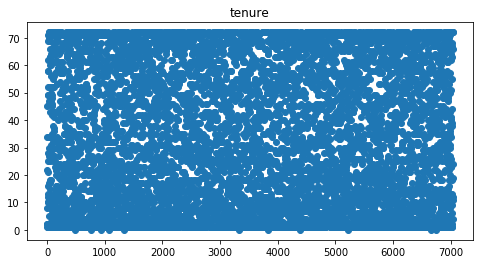

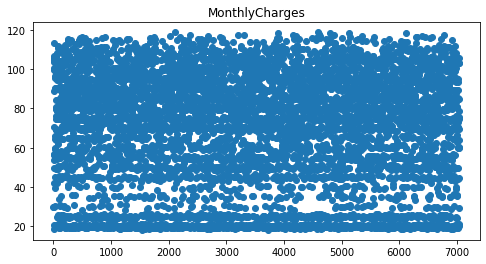

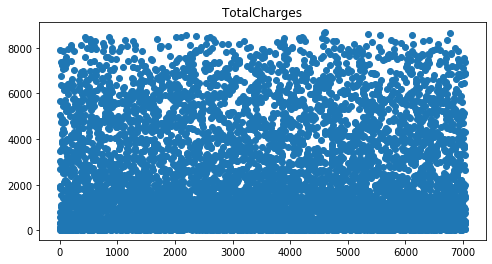

In [10]:
for col in ['tenure','MonthlyCharges','TotalCharges']:
    plt.figure(figsize=(8,4))
    plt.scatter(np.arange(7043),df[col])
    plt.title(col)
    plt.show()

In [11]:
df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

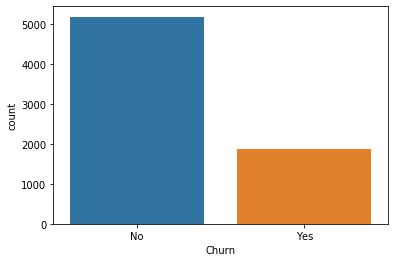

In [12]:
sns.countplot(df['Churn'])
plt.show()

From the plot above we see that imbalanced data point. This can affect the prediction result later. We will fix it later.

#### 3.2 Bivariate Analysis

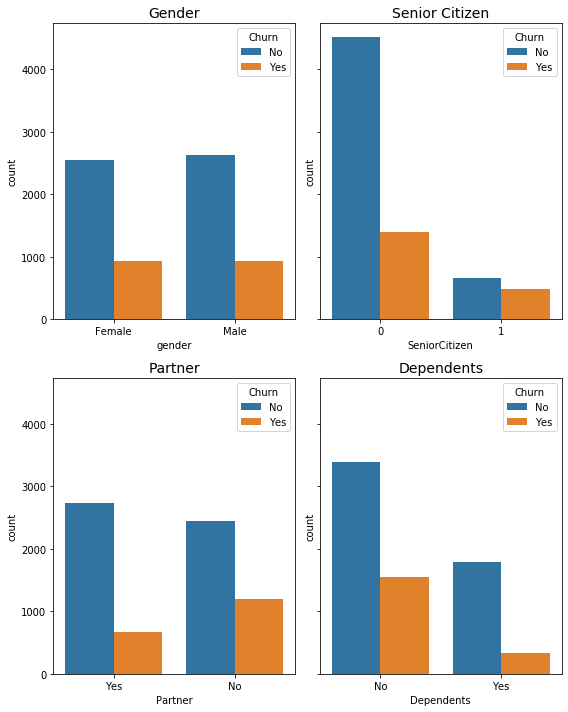

In [13]:
fig, axes = plt.subplots(ncols=2,nrows=2,figsize=(8,10),sharey=True)
sns.countplot(x='gender',hue='Churn',data=df,ax=axes[0,0])
axes[0,0].set_title('Gender',fontsize=14)
sns.countplot(x='SeniorCitizen',hue='Churn',data=df,ax=axes[0,1])
axes[0,1].set_title('Senior Citizen',fontsize=14)
sns.countplot(x='Partner',hue='Churn',data=df,ax=axes[1,0])
axes[1,0].set_title('Partner',fontsize=14)
sns.countplot(x='Dependents',hue='Churn',data=df,ax=axes[1,1])
axes[1,1].set_title('Dependents',fontsize=14)
plt.tight_layout()
plt.show()

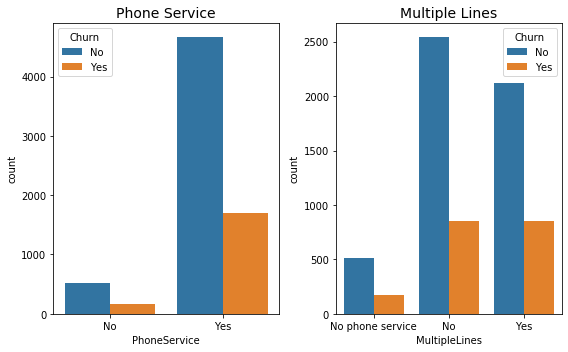

In [14]:
fig, axes = plt.subplots(ncols=2,figsize=(8,5))
sns.countplot(x='PhoneService',hue='Churn',data=df,ax=axes[0])
axes[0].set_title('Phone Service',fontsize=14)
sns.countplot(x='MultipleLines',hue='Churn',data=df,ax=axes[1])
axes[1].set_title('Multiple Lines',fontsize=14)
plt.tight_layout()
plt.show()

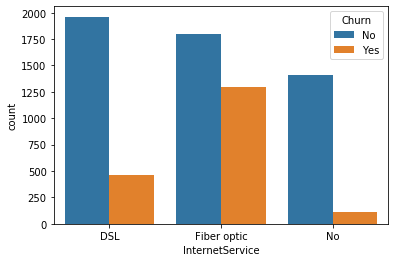

In [15]:
sns.countplot(x='InternetService',hue='Churn',data=df)
plt.show()

We can see that the customer who uses Fiber Optic Service is more likely to leave the company compares to the other. Maybe, this is caused by the price of this service is too high.

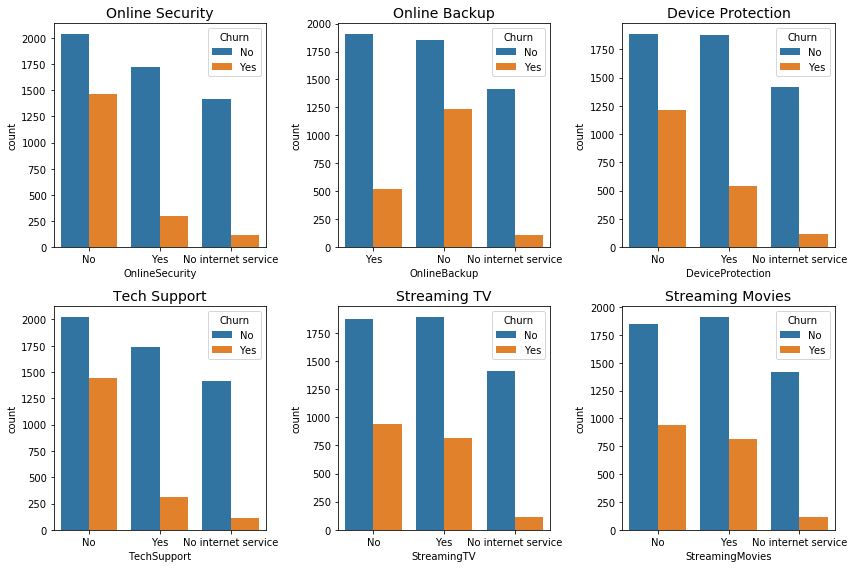

In [16]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12,8))
sns.countplot(x='OnlineSecurity',data=df,hue='Churn',ax=axes[0,0])
axes[0,0].set_title('Online Security',fontsize=14)
sns.countplot(x='OnlineBackup',data=df,hue='Churn',ax=axes[0,1])
axes[0,1].set_title('Online Backup',fontsize=14)
sns.countplot(x='DeviceProtection',data=df,hue='Churn',ax=axes[0,2])
axes[0,2].set_title('Device Protection',fontsize=14)
sns.countplot(x='TechSupport',data=df,hue='Churn',ax=axes[1,0])
axes[1,0].set_title('Tech Support',fontsize=14)
sns.countplot(x='StreamingTV',data=df,hue='Churn',ax=axes[1,1])
axes[1,1].set_title('Streaming TV',fontsize=14)
sns.countplot(x='StreamingMovies',data=df,hue='Churn',ax=axes[1,2])
axes[1,2].set_title('Streaming Movies',fontsize=14)
plt.tight_layout()
plt.show()

Customers who leave the company are different depending on the service they used.

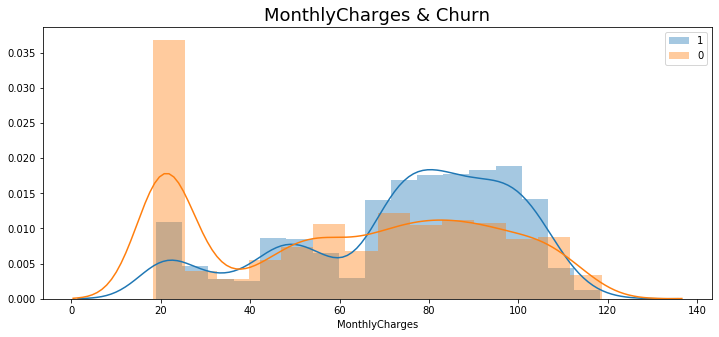

In [17]:
plt.figure(figsize=(12,5))
sns.distplot(df['MonthlyCharges'][df['Churn']=='Yes'])
sns.distplot(df['MonthlyCharges'][df['Churn']=='No'])
plt.title('MonthlyCharges & Churn', fontsize=18)
plt.legend(['1','0'])
plt.show()

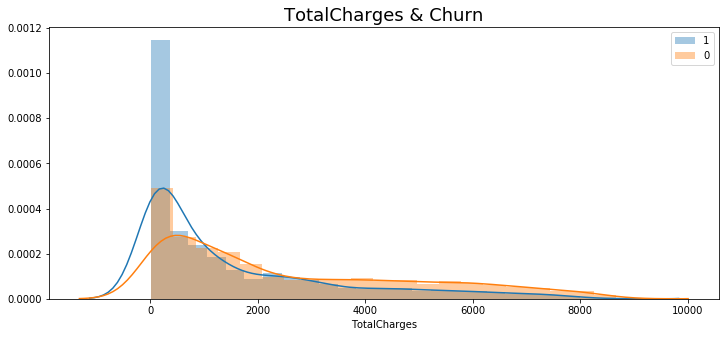

In [18]:
plt.figure(figsize=(12,5))
sns.distplot(df['TotalCharges'][df['Churn']=='Yes'])
sns.distplot(df['TotalCharges'][df['Churn']=='No'])
plt.title('TotalCharges & Churn', fontsize=18)
plt.legend(['1','0'])
plt.show()

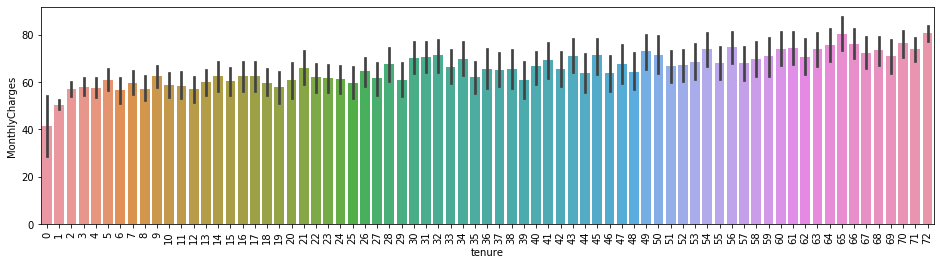

In [19]:
plt.figure(figsize=(16,4))
ten = sns.barplot(data=df,x='tenure',y='MonthlyCharges')
ten.set_xticklabels(ten.get_xticklabels(),rotation=90)
plt.show()

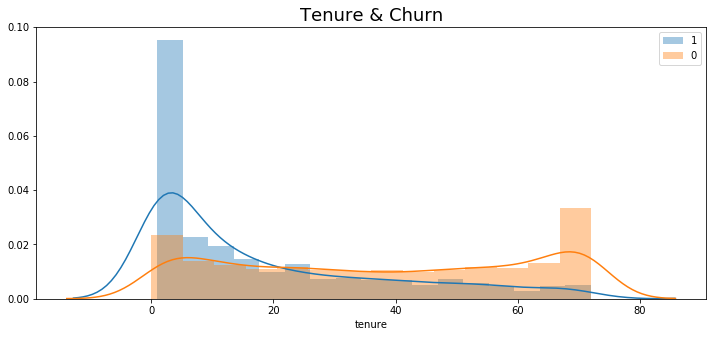

In [20]:
plt.figure(figsize=(12,5))
sns.distplot(df['tenure'][df['Churn']=='Yes'])
sns.distplot(df['tenure'][df['Churn']=='No'])
plt.title('Tenure & Churn', fontsize=18)
plt.legend(['1','0'])
plt.show()

The more customers tenure means the more they likely stay on the company.

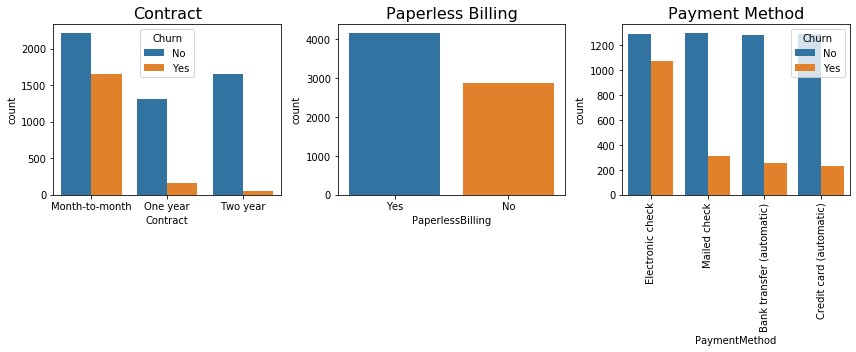

In [21]:
fig, axes = plt.subplots(ncols=3, figsize=(12,5))
sns.countplot(data=df,x='Contract',hue='Churn',ax=axes[0])
axes[0].set_title('Contract',fontsize=16)
sns.countplot(data=df,x='PaperlessBilling',ax=axes[1])
axes[1].set_title('Paperless Billing',fontsize=16)
pay = sns.countplot(data=df,x='PaymentMethod',hue='Churn',ax=axes[2])
pay.set_xticklabels(pay.get_xticklabels(),rotation=90)
axes[2].set_title('Payment Method',fontsize=16)
plt.tight_layout()
plt.show()

On the Contract Column, as previously said that the longer customer tenure means there is a small chance to customer leaves the company.

#### 3.3 Multivariate Analysis

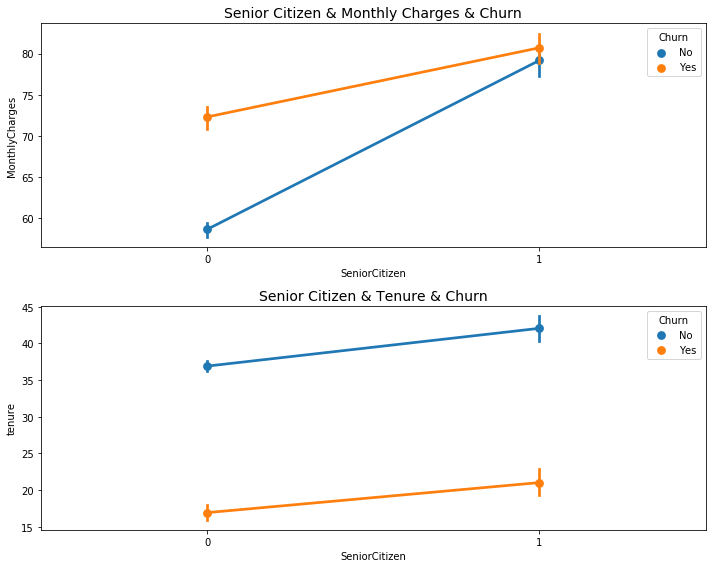

In [22]:
fig, axes = plt.subplots(nrows=2, figsize=(10,8))
sns.pointplot(data=df,x='SeniorCitizen',y='MonthlyCharges',hue='Churn',ax=axes[0])
axes[0].set_title('Senior Citizen & Monthly Charges & Churn',fontsize=14)
sns.pointplot(data=df,x='SeniorCitizen',y='tenure',hue='Churn',ax=axes[1])
axes[1].set_title('Senior Citizen & Tenure & Churn',fontsize=14)
plt.tight_layout()
plt.show()

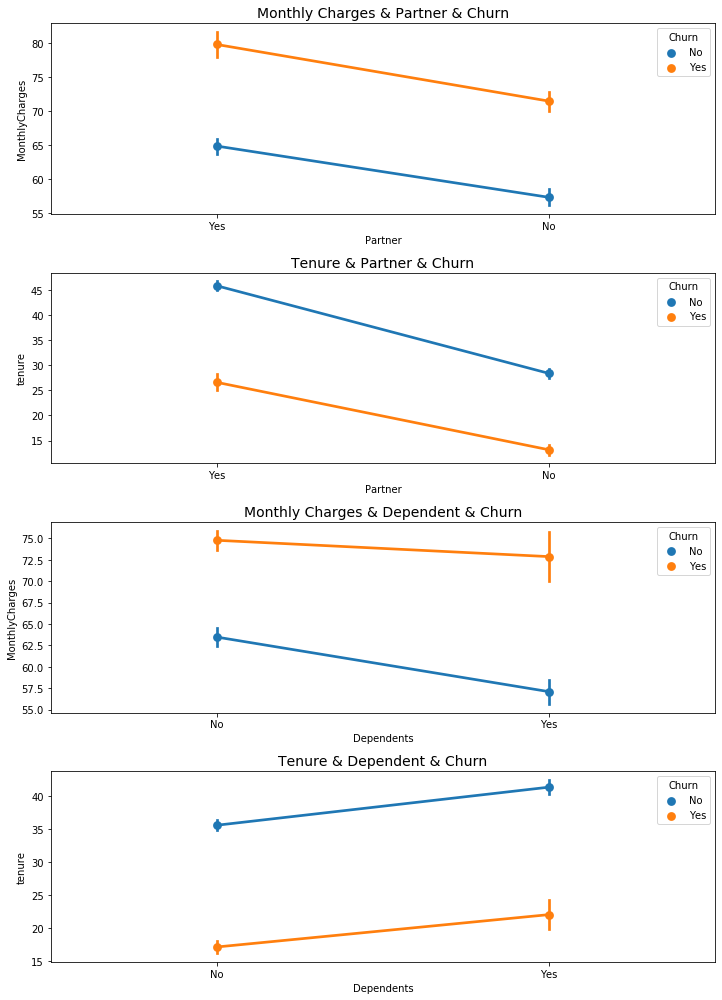

In [23]:
fig, axes = plt.subplots(nrows=4, figsize=(10,14))
sns.pointplot(data=df,y='MonthlyCharges',x='Partner',hue='Churn',ax=axes[0])
axes[0].set_title('Monthly Charges & Partner & Churn',fontsize=14)
sns.pointplot(data=df,y='tenure',x='Partner',hue='Churn',ax=axes[1])
axes[1].set_title('Tenure & Partner & Churn',fontsize=14)
sns.pointplot(data=df,y='MonthlyCharges',x='Dependents',hue='Churn',ax=axes[2])
axes[2].set_title('Monthly Charges & Dependent & Churn',fontsize=14)
sns.pointplot(data=df,y='tenure',x='Dependents',hue='Churn',ax=axes[3])
axes[3].set_title('Tenure & Dependent & Churn',fontsize=14)
plt.tight_layout()
plt.show()

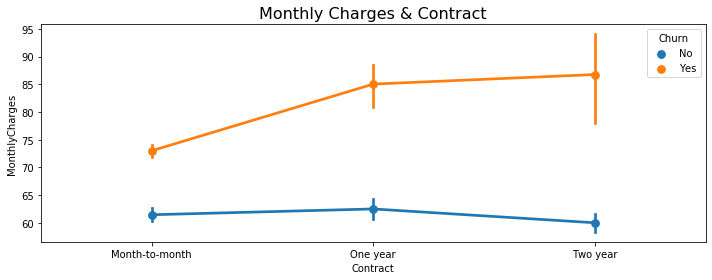

In [24]:
plt.figure(figsize=(10,4))
sns.pointplot(data=df,y='MonthlyCharges',x='Contract',hue='Churn').set_title('Monthly Charges & Contract',fontsize=16)
plt.tight_layout()
plt.show()

---

#### Encoding Variable Columns

In [25]:
train = df.copy()

In [26]:
from sklearn.preprocessing import LabelEncoder
encode = LabelEncoder()

In [27]:
cols = ['gender','Partner', 'Dependents','PhoneService', 'MultipleLines', 'InternetService',
        'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
        'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']

In [28]:
train[cols] = train[cols].apply(encode.fit_transform)
train.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,5575-GNVDE,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,3668-QPYBK,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,7795-CFOCW,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,9237-HQITU,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


In [29]:
train.drop('customerID',axis=1,inplace=True)

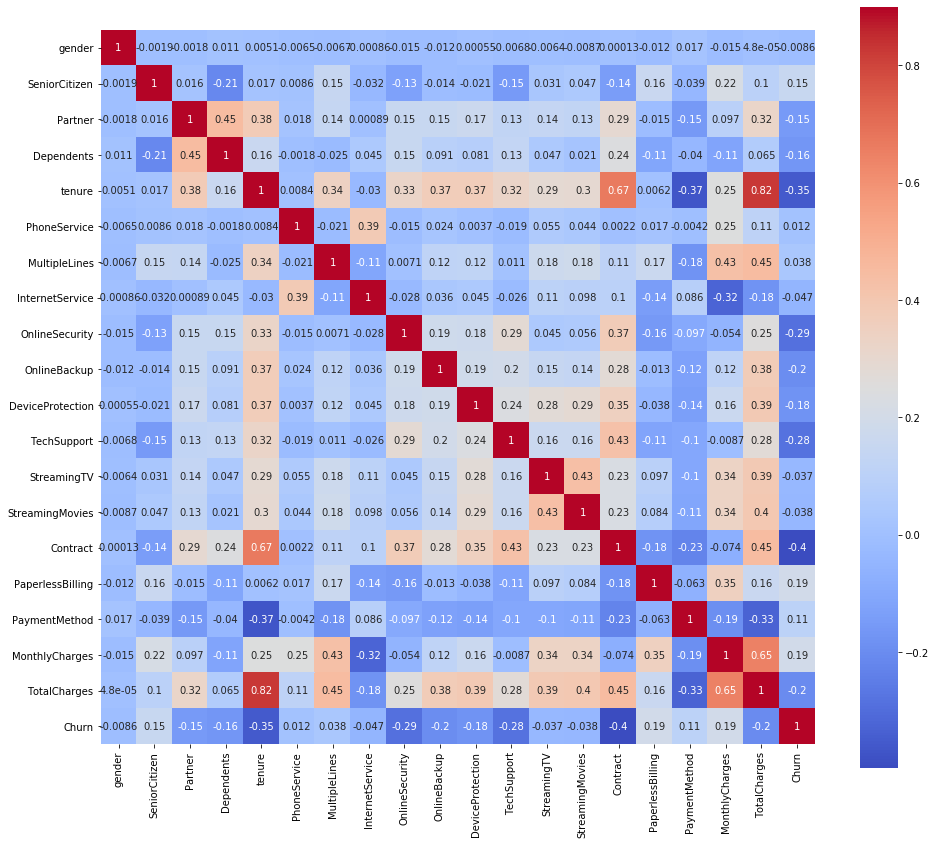

In [30]:
cor = train.corr()
plt.figure(figsize=(16,14))
sns.heatmap(cor,square=True,vmax=0.9,cmap='coolwarm',annot=True)
plt.show()

Based on analysis above, we decide to not use **gender, PhoneService, Contract, and TotalCharges.**
1. gender and PhoneService is the lowest correlation score, so we pull out.
2. Contract and tenure have the same function so we choose one of that. Same as the column of TotalCharges and MonthlyCharges.

In [31]:
train.drop(['gender','PhoneService','Contract','TotalCharges'],axis=1,inplace=True)

In [32]:
train.head()

,SeniorCitizen,Partner,Dependents,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,0,1,0,1,1,0,0,2,0,0,0,0,1,2,29.85,0
1,0,0,0,34,0,0,2,0,2,0,0,0,0,3,56.95,0
2,0,0,0,2,0,0,2,2,0,0,0,0,1,3,53.85,1
3,0,0,0,45,1,0,2,0,2,2,0,0,0,0,42.30,0
4,0,0,0,2,0,1,0,0,0,0,0,0,1,2,70.70,1


In [33]:
x = train.drop('Churn',axis=1)
y = train['Churn']

#### Handling Imbalance Target Variable

As we said before that the target variable has an imbalance data point. So we use Synthetic Minority Oversampling Technique (SMOTE) to handle this problem.

In [34]:
from imblearn.over_sampling import SMOTE

In [35]:
smote = SMOTE()
x_sm, y_sm = smote.fit_resample(x,y)

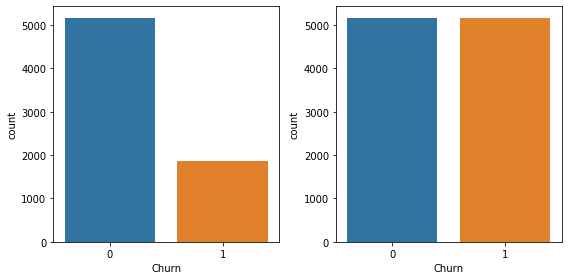

In [36]:
fig, axes = plt.subplots(ncols=2, figsize=(8,4))
sns.countplot(x=y, ax=axes[0])
sns.countplot(x=y_sm, ax=axes[1])
plt.tight_layout()
plt.show()

## 4. Data Modelling and Evaluation

In [37]:
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import accuracy_score

In [38]:
x_train, x_test, y_train, y_test = train_test_split(x_sm,y_sm,test_size=0.2,random_state=23)

In [39]:
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [40]:
from sklearn.model_selection import cross_val_score, RandomizedSearchCV

In [41]:
def acc(model):
    return cross_val_score(model, x_train, y_train, cv=10, scoring='accuracy').mean()

In [42]:
#Model 1: Logistic Regression
log_reg = LogisticRegression(solver='liblinear')
print('Accuracy of Model Logistic Regression is : {0:.4f}%'.format(acc(log_reg)))

#Model 2: Ridge
ridge = RidgeClassifier()
print('Accuracy of Model Ridge Classifier is : {0:.4f}%'.format(acc(ridge)))

#Model 3: K-Nearest Neighbor
knn = KNeighborsClassifier()
print('Accuracy of Model KNN is : {0:.4f}%'.format(acc(knn)))

#Model 4: Decision Tree
dt = DecisionTreeClassifier()
print('Accuracy of Model Decision Tree is : {0:.4f}%'.format(acc(dt)))

#Model 5: Support Vector Machine
svm = SVC()
print('Accuracy of Model SVM is : {0:.4f}%'.format(acc(svm)))

Accuracy of Model Logistic Regression is : 0.7752%
Accuracy of Model Ridge Classifier is : 0.7739%
Accuracy of Model KNN is : 0.7910%
Accuracy of Model Decision Tree is : 0.7766%
Accuracy of Model SVM is : 0.7510%


#### Ensemble Method

In [43]:
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, GradientBoostingClassifier

In [44]:
#Model 1: Ada Boost
ada = AdaBoostClassifier()
print('Accuracy of Model Ada Boost is : {0:.4f}%'.format(acc(ada)))

#Model 2: Random Forest
rf = RandomForestClassifier()
print('Accuracy of Model Random Forest is : {0:.4f}%'.format(acc(rf)))

#Model 3: Gradient Boost
gb = GradientBoostingClassifier()
print('Accuracy of Model Gradient Boost is : {0:.4f}%'.format(acc(gb)))

Accuracy of Model Ada Boost is : 0.7940%
Accuracy of Model Random Forest is : 0.8300%
Accuracy of Model Gradient Boost is : 0.8114%


Random Forest has the highest accuracy compared to other models. So we choose that model.

#### Test Selected Model

In [68]:
rf.fit(x_train,y_train)
pred = rf.predict(x_test)
print(accuracy_score(y_test,pred))

0.8386473429951691


#### Tuning Selected Model

In [69]:
params = {'n_estimators':np.arange(10,200,20), #For number of trees in the forest
          'max_depth':np.arange(2,20,2) #For Maximum depth of each tree in the forest
         }

In [70]:
rf_tune = RandomizedSearchCV(rf, param_distributions=params, cv=10, scoring='accuracy',n_iter=30)
rf_tune.fit(x_train,y_train)

RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
              

In [71]:
print(rf_tune.best_params_)
print(rf_tune.best_score_)

{'n_estimators': 90, 'max_depth': 18}
0.8354698607971308


Noted : I'm using Randomized Search instead of Grid Search cause my PC that I use to make this model is too old. It means can take more time if I using Grid Search. After doing research, again and again, we get the parameter that shows a little improved accuracy.

#### Test Tuning Model

In [50]:
rf_tune = RandomForestClassifier(n_estimators=180, max_depth=16)
rf_tune.fit(x_train,y_train)
pred_tune = rf_tune.predict(x_test)
print(accuracy_score(y_test,pred_tune))

0.8497584541062801


In [51]:
importance_feat = pd.DataFrame(rf_tune.feature_importances_, index=x_train.columns, columns=['imp_feat'])

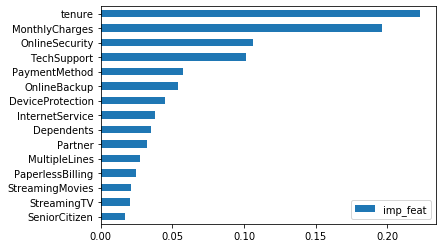

In [52]:
importance_feat.sort_values(by='imp_feat').plot(kind='barh')

## 5. Conclusion

Based on the plot above, we can see that the top 5 things that influence customers to stay in the company are:
1. **tenure:** shows that the longer the customer is in the company, caused the less chance of customers to churn.
2. **Monthly Charges:** based on the plot that we have made from the previous analysis, shows that the cheaper price of a service is the higher chance of customers to stay.
3. **Online Security and TechSupport:** it turns out customers will feel comfortable staying on the company if the company cares about security in its services and adequate technical assistance. This is evidenced by the results of the analysis in the form of a plot above.
4. **Payment Method:** Payment methods also affect customer loyalty.